## Online Retail Data - Project 2018
-------------------------
### 1. Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.

### Selected dataset: Online Retail Data Set 

Dataset from UCI - Machine Learning Repository

https://archive.ics.uci.edu/ml/datasets/Online+Retail

This Dataset was selected as it fit the criteria of the project: 
- It had more than 4 variables. 
- It has over 100 datapoints (The initial dataset before cleaning had 65,535 rows.)
- There was a date column (opportunity to work with pandas timeseries)

This is a transactional data set which contains all the transactions occurring between two months, 01/12/2010 and 09/12/2011, for a UK-based and registered non-store online retail. Transactions occured in 22 countries.

This dataset was analysed using:
- Pandas https://pandas.pydata.org/
()[img/pandas]
- NumPy http://www.numpy.org/
- Seaborn for data visualisations https://seaborn.pydata.org/




In [4]:
# import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# read excel, using xls as it reads in faster
df = pd.read_excel("Online-Retail.xls")
# investigate the shape
df.shape

(65535, 8)

In [6]:
# a look at the first 10 rows
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Let's look at the descriptive statistics

Looking at the summary statistics we can quickly see some issues. 
- Quantity has negative values
- Unit price has values of zero. 

In [7]:
# descriptive statistics
df.describe()

,Quantity,UnitPrice,CustomerID
count,65535.000000,65535.000000,40218.000000
mean,8.363119,5.856143,15384.033517
std,413.694482,145.755953,1766.863499
min,-74215.000000,0.000000,12346.000000
25%,1.000000,1.250000,14001.000000
50%,2.000000,2.510000,15358.000000
75%,8.000000,4.240000,17019.000000
max,74215.000000,16888.020000,18283.000000


### Cleaning the data

From the above summary statitics, it was clear that there were issues with the data, negative value and 0 values from Unit Price. I investigated how more educated people approached these problems and I found the following online tutorials very helpful: 

1. https://realpython.com/python-data-cleaning-numpy-pandas/
2. https://www.oreilly.com/learning/handling-missing-data

Following this research, these are the steps I took to clean my data:
- Check for missing values and removing those rows.
- Check for negative values
- Check for duplicates
- Check for Unit Price equals to 0
- There is a Quantity value of -74215 and 74215. As the negative value will be removed while cleaning the data. As the positive value should also be removed as they cancel each other out and will cause an extreme outlier in dataset otherwise.

#### Finding missing Values and removing them
Using isnull() we can quickly see where the null values are

In [8]:
# check for null values
# There are null values in Customer ID and Description
df.isnull().sum()

InvoiceNo          0
StockCode          0
Description      166
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     25317
Country            0
dtype: int64

Removing rows with missing values/null values, any negative quanitities, unit price less than than 1, Quantity greater than 74214.

In [9]:
# removing missing values, quantity and unit price with 0 values and Quantity = 74215
df = df[df.CustomerID.notnull() & (df.Quantity > 0) & (df.UnitPrice > 0) & (df.Quantity < 74214)]
# drop rows with missing value
df.dropna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


#### Removing Duplicates

In [10]:
# This will remove duplicates
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop_duplicates.html
df.drop_duplicates()
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


Reviewing the summary stastics following the data cleaning.

- The row count has dropped to 39,183.
- We can see from the descriptive statistics that there are no quantities less than 1 or Unit Price equal to 0.
- The count has dropped significantly. 

In [11]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,39183.000000,39183.000000,39183.000000
mean,12.722558,3.127540,15393.857311
std,49.120346,5.252035,1769.030365
min,1.000000,0.070000,12347.000000
25%,2.000000,1.250000,14030.500000
50%,5.000000,1.950000,15373.000000
75%,12.000000,3.750000,17059.000000
max,3114.000000,295.000000,18283.000000


-------------------------
### 2. Investigate the types of variables involved, their likely distributions, and their relationships with each other.

### Questions:

1. How many Countries are there? Which country has the biggest market share? no.of customers, most quantity sold, largest total cost
3. When were the most items sold? Day and Month
3. Customers who spent the most?
4. Most frequent Shopper? 

Exploratory Data Analysis

In [12]:
# what type of data am I dealing with?
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

### How many countries are there?

This variable is Nominal variable as there is more than two variables. There are 22 countries in total.

In [13]:
#number of countries in the dataset
myArray = np.unique(df['Country'])
len(myArray)

22

In [14]:
# Show me the unique country varibales
# https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.unique.html
np.unique(df['Country'])

array(['Australia', 'Austria', 'Belgium', 'Channel Islands', 'Cyprus',
       'Denmark', 'EIRE', 'Finland', 'France', 'Germany', 'Iceland',
       'Italy', 'Japan', 'Lithuania', 'Netherlands', 'Norway', 'Poland',
       'Portugal', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom'],
      dtype=object)

### A Large proportion of the customers are form the UK.

In [15]:
# create a new dataframe with the data and count the number of CustomerIDs and group by country
mostpopular=df[['Country','CustomerID']]
mostpopular.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)


,Country,CustomerID
21,United Kingdom,35084
8,France,957
9,Germany,909
6,EIRE,418
18,Spain,353
17,Portugal,204
14,Netherlands,186
20,Switzerland,175
15,Norway,147
0,Australia,139


### Investigating the Invoice Date Column

This variable is a timeseries and the data is taken over a period of two months, December 2010 to January 2011. 

Using the following data, I will discover:
- which month had the biggest spend
- which day had the biggest spend

I just need to prepare the data using pandas time series. 

In [16]:
# add a new column for date 
# convert date column to date time + add new column
df['Date'] = pd.to_datetime(df['InvoiceDate'])

# create a new column for month
df['Month'] = df['Date'].dt.strftime('%b %Y')
df['Month'] = pd.to_datetime(df['Month'])
# create a new column for month
df['Day'] = df['Date'].dt.strftime('%D')
df['Day'] = pd.to_datetime(df['Day'])

# create a new column for month
df['Day'] = df['Date'].dt.strftime('%D')
df['Weekday'] = pd.to_datetime(df['Day'])
df['Weekday'] = df['Weekday'].dt.day_name()

# create a new column for time
df['Time'] = df['Date'].dt.strftime('%r')
df['Time'] = pd.to_datetime(df['Time'])
# strip out the date and keep the time
df['Time'] = pd.Series([val.time() for val in df['Time']])

# create a new column for Hour
df['Hour'] = df['Date'].dt.strftime('%r')
df['Hour'] = pd.to_datetime(df['Hour']).dt.round("H").dt.hour


#investigating the time series of the data
df['Month'].unique()

array(['2010-12-01T00:00:00.000000000', '2011-01-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

### Calculating the total spend

Firstly, calculate the total spend and then group by country. 

In [17]:
# What is the Total Spend calculation and adding a new column
df['Total Spend'] =  df['UnitPrice'] * df['Quantity']
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Month,Day,Weekday,Time,Hour,Total Spend
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,12/01/10,Wednesday,08:26:00,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,12/01/10,Wednesday,08:26:00,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,12/01/10,Wednesday,08:26:00,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,12/01/10,Wednesday,08:26:00,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,12/01/10,Wednesday,08:26:00,8,20.34


### What country had the highest sales?

The United Kingdom had the highest sales from the of 22 countries.

In [18]:
# grouping by country to find the Total spend in each country
# using the agg sum here to calculate the total 
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.core.groupby.DataFrameGroupBy.agg.html
totalcost = df.groupby('Country', as_index=False).agg({"Total Spend": "sum"}).sort_values(
    'Total Spend', ascending=False)

#view head of dataframe
totalcost.head(10)

,Country,Total Spend
21,United Kingdom,745045.86
6,EIRE,29069.02
14,Netherlands,27200.86
9,Germany,23094.40
8,France,21943.93
18,Spain,10056.52
0,Australia,9665.88
12,Japan,7705.07
17,Portugal,5811.75
20,Switzerland,4909.55


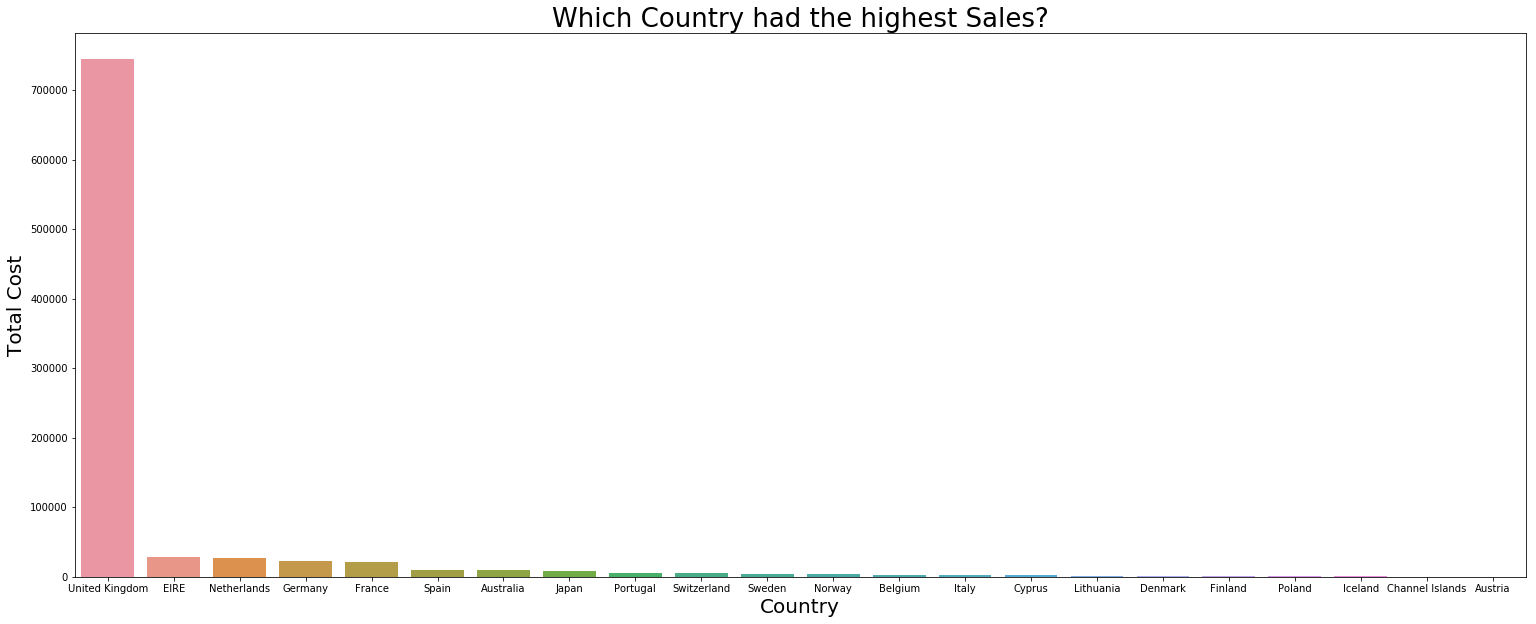

In [19]:
%matplotlib inline

plt.figure(figsize=(26, 10))

#using the data from the above dataframe to show total spend by country
plot =sns.barplot(x='Country',y='Total Spend', data=totalcost)

plot.set_title('Which Country had the highest Sales?',fontsize=26)

plot.set_xlabel('Country',fontsize=20)
plot.set_ylabel('Total Cost',fontsize=20)
plot

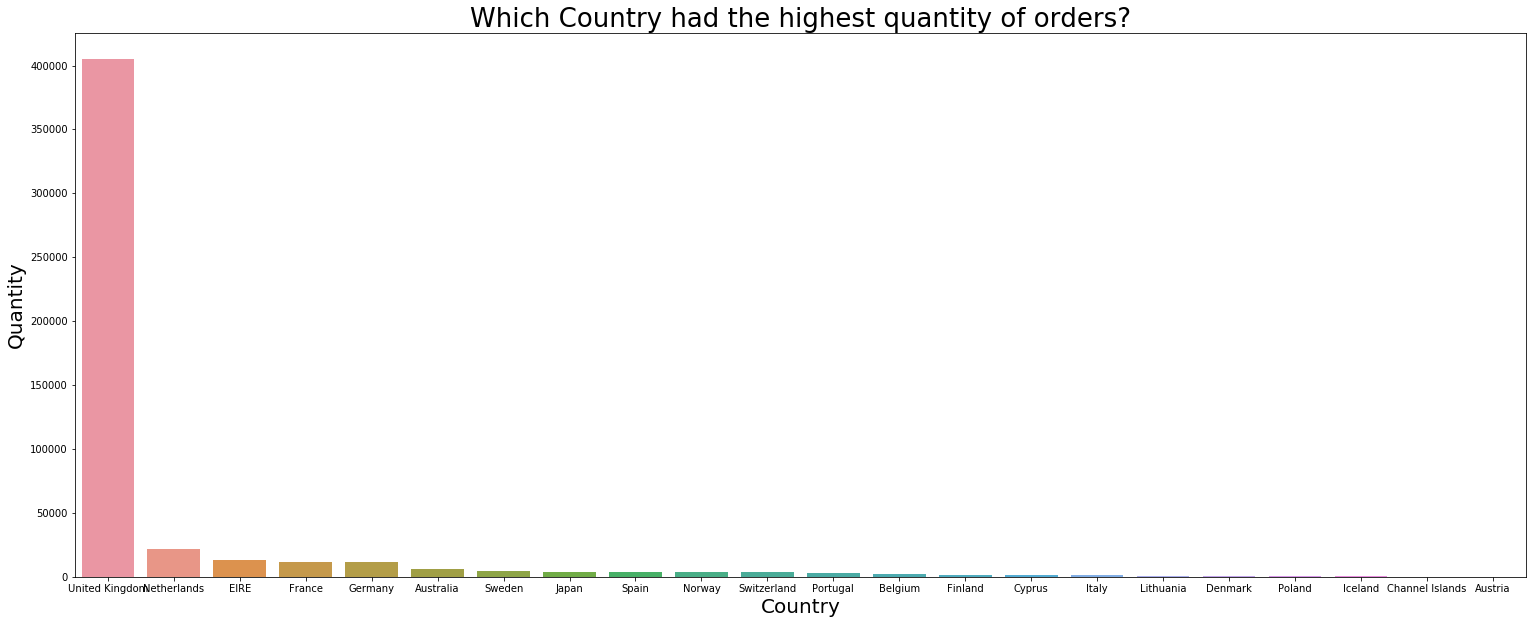

In [20]:
# create a new dataframe to find the country with the most quanitity
detailed = df.groupby('Country', as_index=False).agg(
    {"Total Spend": "sum", "Quantity":"sum", "CustomerID":"count"}).sort_values(
    'Quantity', ascending=False)

%matplotlib inline
plt.figure(figsize=(26, 10))
plot = sns.barplot(x='Country',y='Quantity', data=detailed)


plot.set_title('Which Country had the highest quantity of orders?',fontsize=26)
plot.set_xlabel('Country',fontsize=20)
plot.set_ylabel('Quantity',fontsize=20)
plot

### Which Customer who spent the most?
Calculate the spend of each customer, the quantity and the frequency. Using pandas rename function to create new columns.
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html


In [21]:
# creating a new dataframe for bestcustomer
bestcustomer = df.groupby('CustomerID', as_index=False).agg(
    {"Total Spend": "sum", "Quantity":"sum", "InvoiceNo": pd.Series.nunique}).sort_values('Total Spend', ascending=False)

# renaming the columns
bestcustomer.rename(columns={'CustomerID':'CustomerID', "Total Spend": "Spend", 'Quantity':'Quantity', "InvoiceNo":"Frequency"}, inplace=True)
bestcustomer.head(10)

,CustomerID,Spend,Quantity,Frequency
1109,18102.0,27834.61,6695,4
421,14646.0,27008.26,21284,5
637,15749.0,22998.40,9014,2
503,15061.0,22107.61,10801,16
963,17450.0,20649.04,6840,5
329,14156.0,17096.92,7746,2
693,16029.0,14820.15,8689,10
476,14911.0,11218.36,5025,16
971,17511.0,10573.22,8340,4
152,13089.0,9650.39,5345,13


### Who are the loyal/returning customers?

From the data, I can calculate the most frequent customers based on the number of invoice. There should only be 1 invoice per transaction. Who are the loyal customers and how much do they spend?

In [22]:
# pd.Series.nunique is used to count only the unique invoices
# https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.Series.nunique.html 

loyalcustomer = df.groupby('CustomerID', as_index=False).agg(
    {"InvoiceNo":pd.Series.nunique, "Total Spend": "sum"}).sort_values('InvoiceNo', ascending=False)
loyalcustomer.rename(columns={'CustomerID':'CustomerID', "InvoiceNo":"Frequency", "Total Spend": "Spend", 'Quantity':'Quantity'}, inplace=True)

#checking on one customer
#loyalcustomer[loyalcustomer['CustomerID'] == 17850]
loyalcustomer.head(10)

,CustomerID,Frequency,Spend
89,12748.0,39,4646.90
1044,17850.0,34,5391.21
548,15311.0,16,6128.10
476,14911.0,16,11218.36
503,15061.0,16,22107.61
414,14606.0,13,2314.35
152,13089.0,13,9650.39
1041,17841.0,12,3973.96
266,13777.0,11,7294.42
693,16029.0,10,14820.15


In [23]:
# Testing my data - QA
#new = df[['Country','CustomerID', 'InvoiceNo']]
#new
#new[new['CustomerID'] == 17850]

### What day had the biggest sales?

Jan 10th, 2011 had the biggest sales

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

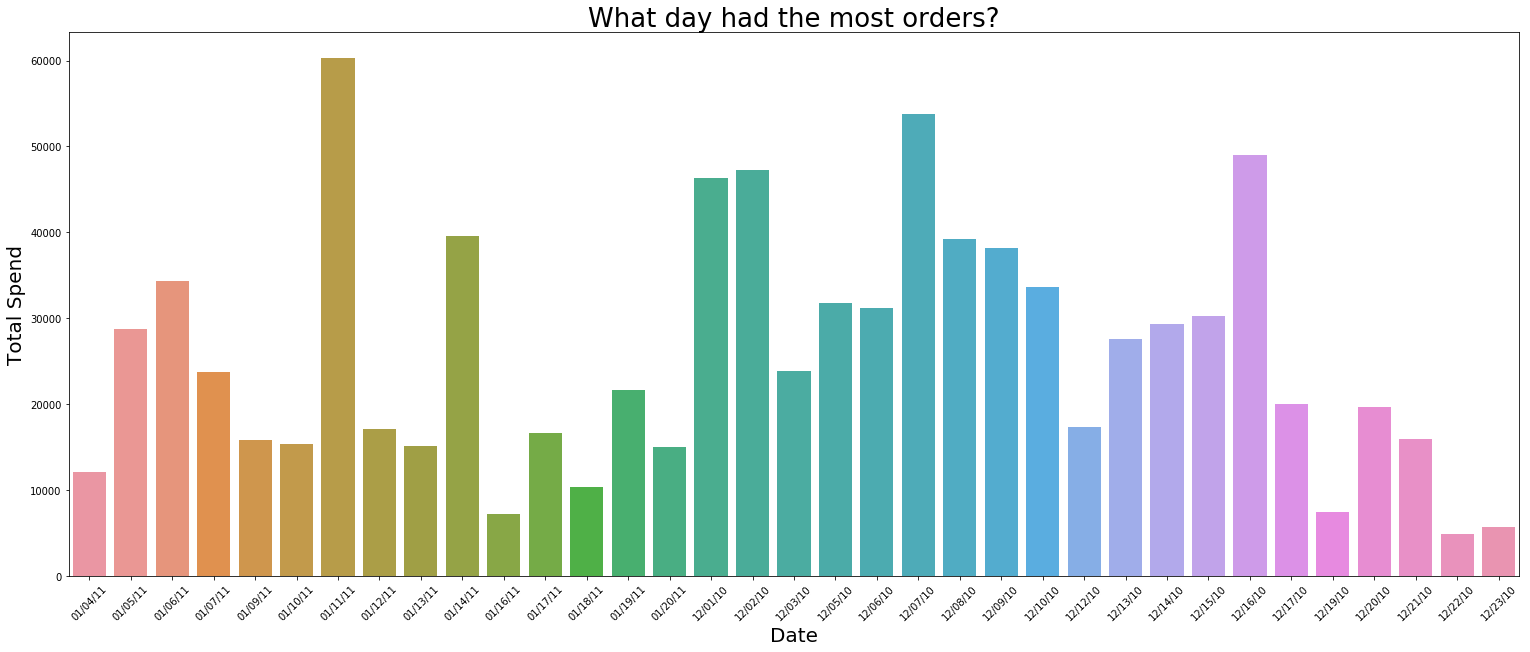

In [24]:
# grouping by day and aggregating spend, quantity, using invoice no to calculate how often the customer visited
bestday = df.groupby('Day', as_index=False).agg(
    { "Total Spend": "sum", "Quantity":"sum", "InvoiceNo":pd.Series.nunique}).sort_values('Day', ascending=True)
bestday.rename(columns={'Day':'Date', "Total Spend": "Total Spend", 'Quantity':'Quantity', "InvoiceNo":"Frequency"}, inplace=True)
bestday.head(10)

%matplotlib inline
plt.figure(figsize=(26, 10))

plot = sns.barplot(x='Date',y='Total Spend', data=bestday)


plot.set_title('What day had the most orders?',fontsize=26)
plot.set_xlabel('Date',fontsize=20)
plot.set_ylabel('Total Spend',fontsize=20)

plt.xticks(rotation=45)


### What Month had the biggest sales?

December had the biggest spend, which I expected due to the christmas period. 

Text(0,0.5,'Total Spend')

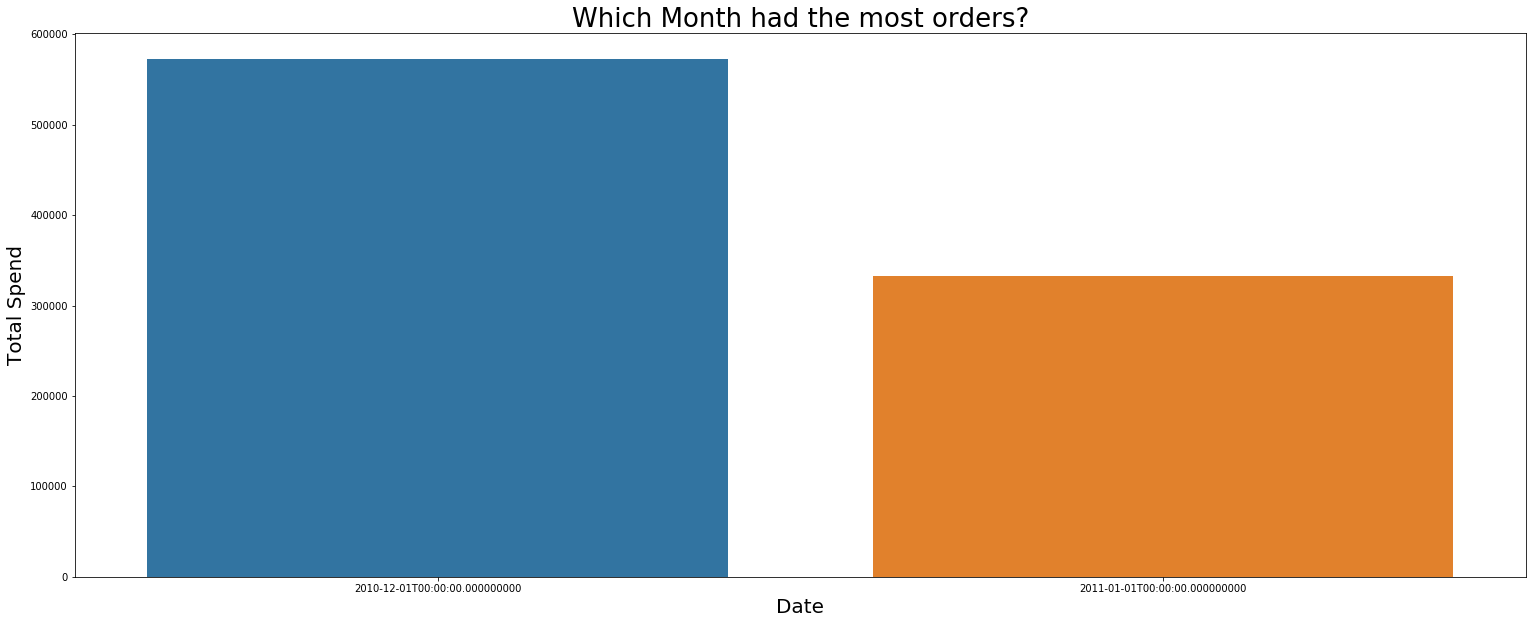

In [25]:
# new dataframe to calculate spend by month
bestmonth = df.groupby('Month', as_index=False).agg(
    { "Total Spend": "sum", "Quantity":"sum", "InvoiceNo": pd.Series.nunique}).sort_values('Month', ascending=True)
bestmonth.rename(columns={'Month':'Month', "Total Spend": "Total Spend", 'Quantity':'Quantity', "InvoiceNo":"Frequency"}, inplace=True)
bestmonth.head(10)

%matplotlib inline
plt.figure(figsize=(26, 10))


plot = sns.barplot(x='Month',y='Total Spend', data=bestmonth)

plot.set_title('Which Month had the most orders?',fontsize=26)
plot.set_xlabel('Date',fontsize=20)
plot.set_ylabel('Total Spend',fontsize=20)

# Add a legend and informative axis label
#plot.legend(ncol=2, loc="lower right", frameon=True)


### What was the frequency of purchases?

As you can see below this is a right skewed histogram. Most customers made purchases on the site once or twice. 

In [26]:
# checking the mean and median
print("Mean: ", bestcustomer["Frequency"].mean())
print("Median: ", bestcustomer["Frequency"].median())

Mean:  1.757469244288225
Median:  1.0


Text(0.5,0,'Frequency')

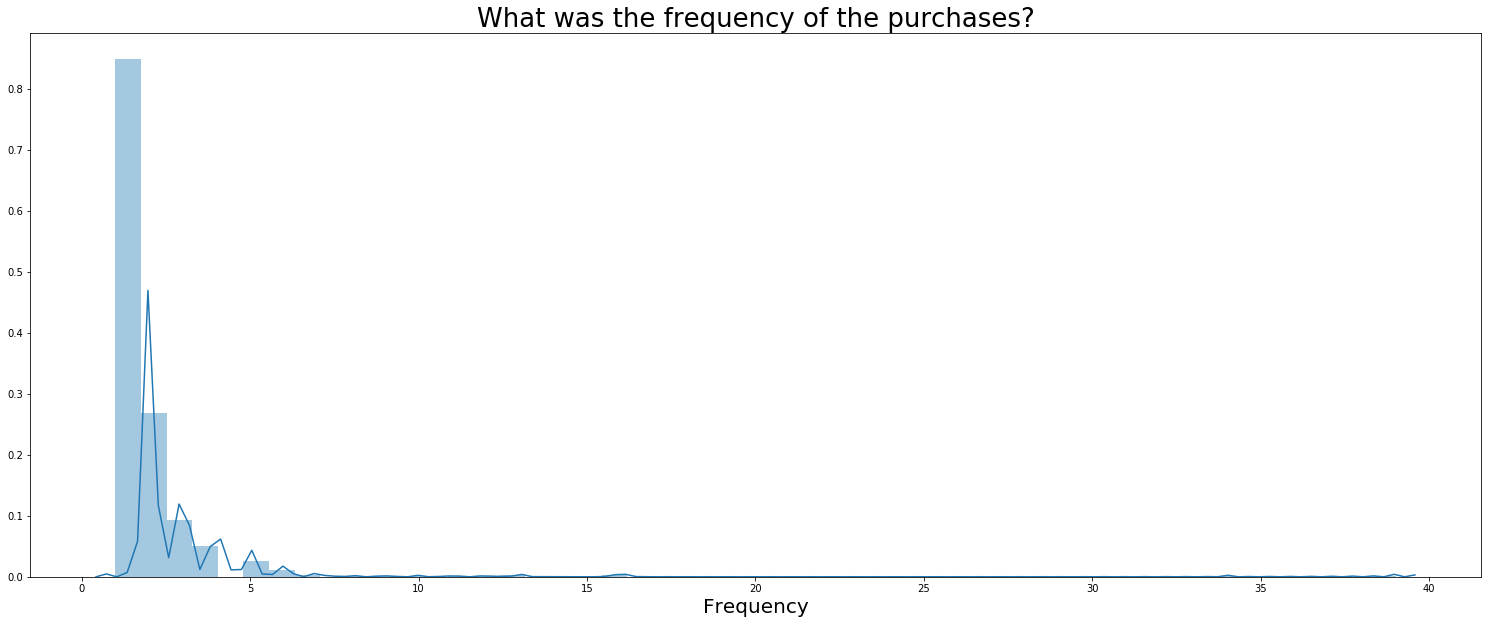

In [27]:

%matplotlib inline
plt.figure(figsize=(26, 10))

# Make a histogram of frequency
plot= sns.distplot( bestcustomer["Frequency"] )
#sns.plt.show()

plot.set_title('What was the frequency of the purchases?',fontsize=26)
plot.set_xlabel('Frequency',fontsize=20)


In [28]:
bestcustomer.describe()

,CustomerID,Spend,Quantity,Frequency
count,1138.000000,1138.000000,1138.000000,1138.000000
mean,15368.397188,796.103893,438.056239,1.757469
std,1745.142894,1973.537006,1080.197541,2.074908
min,12347.000000,0.850000,1.000000,1.000000
25%,13882.500000,206.452500,93.250000,1.000000
50%,15393.000000,353.865000,187.500000,1.000000
75%,16898.750000,704.037500,378.750000,2.000000
max,18283.000000,27834.610000,21284.000000,39.000000


### What hour is the busiest time for the online retail?

In [29]:
# Getting unique values after grouping by hour and date
df_new = df[(df["Month"])].groupby(["Hour", "Date"]).agg(["InvoiceNo"].pd.Series.nunique())
#df_new = df_new.reset_index(name="count")
df_new

KeyError: "['2010-12-01T00:00:00.000000000' '2010-12-01T00:00:00.000000000'\n '2010-12-01T00:00:00.000000000' ... '2011-01-01T00:00:00.000000000'\n '2011-01-01T00:00:00.000000000' '2011-01-01T00:00:00.000000000'] not in index"

In [ ]:
from matplotlib import pyplot as plt
# Getting unique values after grouping by hour and date
df_new = df[(df["Month"])].groupby(["Hour", "Date"])["CustomerID"].size()
df_new = df_new.reset_index(name="CustomerID")
plt.figure(figsize = (16,5))
# Pivot the dataframe to create a [hour x date] matrix containing counts
sns.heatmap(df_new.pivot("hour", "date", "count"), annot=False, cmap="PuBuGn")

In [ ]:
#group_data = df.groupby(['RoundTime','dayoftheweek'])['CustomerID'].count() #sum function

#df.pivot('RoundTime', 'dayoftheweek', 'COUNTER')
df['countcustomer'] = df['CustomerID'].agg()

pd.pivot_table(df, index='RoundTime', columns='dayoftheweek', values="countcustomer")

In [ ]:
flights = sns.load_dataset("flights")

flights


In [ ]:
# new dataframe to calculate spend by month


HEATMAP = df.groupby('Time', as_index=False).agg(
    { "Total Spend": "sum", "Quantity":"sum", "InvoiceNo": pd.Series.nunique}).sort_values('Month', ascending=True)
bestmonth.rename(columns={'Month':'Month', "Total Spend": "Total Spend", 'Quantity':'Quantity', "InvoiceNo":"Frequency"}, inplace=True)
bestmonth.head(10)
df2=df[['Day','Time','CustomerID']]
mostpopular.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)


In [ ]:
# .agg(["InvoiceNo"].pd.Series.nunique()
df2=df[['Weekday','Hour','InvoiceNo']]

df2 = df2.groupby(['Hour', 'Weekday'])['InvoiceNo'].aggregate('count')
df2.rename(columns={'Hour':'Hour', "Weekday": "Weekday", 'InvoiceNo':'InvoiceNo'})
df2

In [ ]:
df2 = df2.pivot("Hour", "Weekday", "InvoiceNo")
plot = sns.heatmap(df2)

----------
### 3. Synthesise/simulate a data set as closely matching their properties as possible.

To simulate the dataset, I depend on np.random.choice to generate alot of the arrays. 

https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html

In [46]:
# I will generate 200 rows in the dataset
size=200

### StockCode
StockCode is made up of five digits with an uppercase letter. Example: 85123A
1. Create a list of random uppercase letters
2. Generate the five digit number
3. Create an empty array
4. Loop through and add number and letter together as a string and add to the new array, stockcode.

In [47]:
import string
# create list of uppercase letters
letterlist = list(string.ascii_uppercase)
letters= np.random.choice(letterlist, size=size)

#create the 5 digit number
number = np.random.choice(a=range(536365,541690), size=size)

# create an empty array for stockcode
stockcode = []

#loop through to add the number +letter as one string to the array
for i in range(len(number)):
    stockcode.append(str(number[i])+ str(letters[i]))
print(stockcode)

['541136T', '538236G', '540077K', '538528E', '536422I', '539546L', '537505K', '538271J', '539042Q', '540963K', '538642P', '540463T', '540622X', '536551R', '540075W', '540879O', '537247J', '537612H', '540539N', '538313F', '540621A', '538997S', '537015V', '541515C', '540807Y', '536730J', '540434K', '541170M', '537345I', '539702Z', '538324F', '537695N', '538798K', '538382T', '541518G', '539895H', '537114C', '540040I', '537302L', '538209T', '538145A', '537465G', '539616V', '536928E', '538183B', '537325R', '538748C', '539506D', '537410H', '540635L', '537007C', '539331X', '537886G', '539403L', '539237G', '537998C', '536567P', '538184B', '538902I', '537368R', '540076F', '540413W', '537230I', '539040Q', '541088J', '537165B', '537743Y', '540116W', '539767S', '539873B', '537833Z', '540958B', '538981D', '538552Q', '540166M', '537007X', '537875C', '537609K', '537114Q', '541155V', '537089P', '541246T', '538779E', '538841Y', '539913D', '536501V', '539554L', '539284F', '537494R', '540504W', '539649D'

### Description
1. Using some of the descriptions from the orginal dataset, I created an array called data. 
2. np.random.choice loops and randomly adds them to a new array.

In [49]:
#Using some of teh descriptions from the original dataset
data = ['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN' , 'CREAM CUPID HEARTS COAT HANGER', 'KNITTED UNION FLAG HOT WATER BOTTLE',
'RED WOOLLY HOTTIE WHITE HEART', 'SET 7 BABUSHKA NESTING BOXES','GLASS STAR FROSTED T-LIGHT HOLDER'
'HAND WARMER UNION JACK', 'HAND WARMER RED POLKA DOT', 'ASSORTED COLOUR BIRD ORNAMENT' , 'POPPY PLAYHOUSE BEDROOM', 'PLAYHOUSE KITCHEN',
'FELTCRAFT PRINCESS CHARLOTTE DOLL','IVORY KNITTED MUG COSY','BOX OF 6 ASSORTED COLOUR TEASPOONS',
'BOX OF VINTAGE JIGSAW BLOCKS','BOX OF VINTAGE ALPHABET BLOCKS', 'HOME BUILDING BLOCK WORD',
'LOVE BUILDING BLOCK WORD','DOORMAT NEW ENGLAND','JAM MAKING SET WITH JARS',
'RED COAT RACK PARIS FASHION','YELLOW COAT RACK PARIS FASHION','BLUE COAT RACK PARIS FASHION','BATH BUILDING BLOCK WORD']

description = [np.random.choice(data) for i in range(size)]
description

['RED COAT RACK PARIS FASHION',
 'BOX OF 6 ASSORTED COLOUR TEASPOONS',
 'DOORMAT NEW ENGLAND',
 'WHITE METAL LANTERN',
 'BATH BUILDING BLOCK WORD',
 'DOORMAT NEW ENGLAND',
 'PLAYHOUSE KITCHEN',
 'FELTCRAFT PRINCESS CHARLOTTE DOLL',
 'IVORY KNITTED MUG COSY',
 'BATH BUILDING BLOCK WORD',
 'RED WOOLLY HOTTIE WHITE HEART',
 'BLUE COAT RACK PARIS FASHION',
 'RED WOOLLY HOTTIE WHITE HEART',
 'HOME BUILDING BLOCK WORD',
 'BOX OF VINTAGE JIGSAW BLOCKS',
 'POPPY PLAYHOUSE BEDROOM',
 'HAND WARMER RED POLKA DOT',
 'FELTCRAFT PRINCESS CHARLOTTE DOLL',
 'ASSORTED COLOUR BIRD ORNAMENT',
 'BOX OF VINTAGE ALPHABET BLOCKS',
 'WHITE METAL LANTERN',
 'BOX OF VINTAGE ALPHABET BLOCKS',
 'BLUE COAT RACK PARIS FASHION',
 'HOME BUILDING BLOCK WORD',
 'BOX OF VINTAGE JIGSAW BLOCKS',
 'IVORY KNITTED MUG COSY',
 'BLUE COAT RACK PARIS FASHION',
 'WHITE METAL LANTERN',
 'LOVE BUILDING BLOCK WORD',
 'JAM MAKING SET WITH JARS',
 'SET 7 BABUSHKA NESTING BOXES',
 'LOVE BUILDING BLOCK WORD',
 'WHITE HANGING HEART T-LI

### InvoiceNo
A six digit number. I reused np.random.choice to create the array. Example: 536365

In [36]:
invoice = np.random.choice(a=range(536365,541690), size=size)
invoice

array([537906, 536901, 541025, 537870, 539444, 537972, 538465, 537797,
       540838, 537532, 536477, 541118, 536811, 541370, 540710, 540948,
       540978, 538146, 538592, 540511, 539329, 541252, 539284, 539699,
       538981, 541334, 541076, 539916, 539240, 540962, 541610, 537465,
       536551, 537067, 540990, 539256, 537961, 539813, 537195, 540511,
       541303, 541499, 539494, 540434, 541213, 538255, 540385, 541301,
       540421, 538797, 536550, 538541, 537973, 537619, 539071, 541658,
       536624, 540186, 538615, 539138, 536616, 539846, 536913, 537750,
       540646, 537621, 540543, 539162, 538695, 540499, 540717, 539589,
       538541, 538601, 539622, 538619, 539262, 540857, 538896, 537780,
       541248, 540275, 536976, 537653, 537873, 540603, 536542, 538887,
       537354, 541082, 541011, 536367, 540424, 538838, 539519, 539395,
       537148, 538903, 540636, 537387, 536825, 537162, 538019, 537386,
       538004, 540144, 537949, 539352, 539659, 538243, 540696, 537118,
      

### CustomerID
Using np.random.choice to generate a 5 digit number. Example: 17850

In [50]:
CustomerID = np.random.choice(a=range(12583, 17850), size=size)
CustomerID

array([16782, 15220, 13897, 17161, 12649, 13863, 16345, 16372, 12800,
       16238, 13014, 17754, 14375, 14159, 17770, 12873, 15885, 14444,
       14690, 16588, 14952, 15701, 16205, 14602, 14688, 16097, 17739,
       16193, 13681, 15554, 13153, 17169, 16792, 15251, 15602, 16091,
       14283, 17258, 16328, 13083, 12882, 17552, 16899, 14679, 15884,
       16625, 14268, 13314, 16294, 16009, 14316, 15828, 13527, 16939,
       16250, 12855, 17028, 16614, 13451, 16521, 13167, 15318, 14351,
       17729, 14822, 17658, 14198, 13045, 14707, 14199, 17729, 12607,
       16652, 12947, 12873, 16497, 14583, 12617, 14121, 15022, 13999,
       12751, 14896, 14862, 14100, 17180, 13710, 17033, 15080, 12926,
       17067, 17486, 13371, 15052, 14147, 14342, 16020, 14377, 13653,
       14169, 15943, 17149, 15084, 15881, 13890, 14592, 13762, 12958,
       14230, 15934, 16584, 13160, 14758, 17005, 14194, 14492, 14233,
       16267, 16576, 13024, 15982, 17032, 13028, 17476, 17790, 15833,
       15176, 13495,

### Quantity	

Using np.random.choice to create quantity. As 75% of the datapoints had a quantity of 12, I will generate the number between 1 and 12.

In [51]:
#Quantity
#count 39184.000000
#mean 14.616246
#std 378.059152
#25% 2.000000
#50% 5.000000
#75% 12.000000
#max 74215.000000

quantity = np.random.choice(a=range(1, 12), size=size)
quantity

array([ 4,  9,  2,  8, 11,  6,  6, 11,  6,  1, 11,  1,  6, 10,  5, 11, 11,
        9, 11, 11,  7,  4,  3,  8,  2,  8,  7,  7,  4,  7,  6, 11,  3, 10,
       10,  5,  6, 11,  8,  4,  5,  3,  5,  5, 10,  7, 11,  6,  9,  7,  3,
       11,  3, 10,  1, 11,  1,  4,  6,  4,  6,  1,  3,  3,  7,  3,  5,  4,
        5,  5, 11,  5,  3,  1, 10,  8,  2,  7,  3,  2, 10,  2,  6,  9, 10,
        9,  7,  9, 11, 10,  9,  9,  8,  5,  6,  5,  8,  9,  7,  2,  6,  7,
       10,  6,  3,  8,  9,  6,  6, 11,  9,  2,  1,  9,  7,  6,  6,  1,  6,
        7,  5,  4,  8,  2,  6,  2,  9,  2, 11,  5,  5,  1,  5,  1,  8,  2,
        3,  7,  3,  6,  6,  8,  7,  9,  6,  8,  6,  7,  7,  6,  8,  5,  3,
        8,  6,  1,  2,  1,  8,  5, 10,  3,  2,  1,  1,  2,  6,  5,  2, 10,
       11, 11,  1, 10,  6,  1,  2,  6, 11,  3,  6,  9,  5,  3,  9, 11, 11,
        1,  3,  1, 11,  9,  9, 11,  8,  2,  5,  7,  8, 11])

### Unit Price

Generate a number with two digits to replicate the unit price. For example: 2.55
This was more difficult due to the decimals.
- Firstly I calculated the mean and standard deviation
- Using np.random.normal to create the numbers using mean and standard deviation
https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html
- np.round to round to two decimals

In [67]:
#mean of unit price
pricemean = df['UnitPrice'].mean()

In [68]:
# standard deviation
pricedev = df['UnitPrice'].std()

In [70]:
#using mean and std from above to generate the numbers with np.random.normal
unitprice = np.round(np.random.normal(loc=pricemean, scale=pricedev, size=size), 2)
unitprice

array([2.38, 2.46, 3.13, 2.66, 4.1 , 3.03, 3.46, 1.56, 2.55, 2.46, 3.24,
       3.03, 2.89, 2.73, 3.3 , 2.19, 2.7 , 3.05, 3.47, 2.09, 3.46, 2.74,
       2.91, 3.53, 1.59, 2.96, 2.76, 2.35, 2.57, 3.27, 3.09, 2.49, 3.76,
       3.21, 3.49, 3.08, 2.42, 2.43, 2.59, 2.83, 2.76, 2.72, 2.37, 3.32,
       2.03, 2.69, 2.19, 2.18, 2.93, 3.44, 2.17, 2.88, 3.15, 3.35, 2.55,
       2.18, 2.66, 2.78, 2.52, 2.3 , 3.5 , 3.48, 1.39, 2.51, 3.03, 1.61,
       3.29, 2.21, 3.65, 3.77, 3.98, 1.26, 2.87, 2.9 , 2.84, 2.47, 3.61,
       3.41, 1.83, 3.1 , 2.55, 2.46, 2.46, 2.23, 2.77, 2.74, 1.06, 1.78,
       1.83, 2.88, 3.06, 3.17, 2.68, 3.98, 2.55, 3.8 , 3.6 , 1.57, 2.3 ,
       3.  , 2.64, 2.4 , 3.24, 2.72, 2.75, 3.34, 3.08, 3.52, 3.32, 2.46,
       3.68, 2.82, 2.67, 3.59, 2.79, 2.51, 2.73, 3.34, 2.99, 2.79, 2.85,
       1.95, 3.27, 2.64, 2.94, 2.14, 4.35, 2.68, 2.7 , 2.66, 2.93, 2.43,
       3.17, 2.97, 2.35, 2.37, 3.05, 3.4 , 3.58, 2.95, 2.7 , 2.5 , 2.59,
       3.19, 3.11, 3.59, 2.84, 1.77, 2.49, 3.49, 2.

### Invoice Date

As the data is collected from two months, 12/01/2010 and 01/31/2011. I generated a dataset between those dates using pd.date_range. Example: 2010-12-01 08:26:00, rounded to minute. 

In [41]:
# adapted from https://pandas.pydata.org/pandas-docs/stable/timeseries.html
rng = pd.date_range('12/01/2010', '01/31/2011', periods=size)

# To remove the extra decimal places
invoicedatedata = pd.Series(rng).dt.round("min")
invoicedatedata

0     2010-12-01 00:00:00
1     2010-12-01 07:21:00
2     2010-12-01 14:43:00
3     2010-12-01 22:04:00
4     2010-12-02 05:26:00
5     2010-12-02 12:47:00
6     2010-12-02 20:08:00
7     2010-12-03 03:30:00
8     2010-12-03 10:51:00
9     2010-12-03 18:13:00
10    2010-12-04 01:34:00
11    2010-12-04 08:55:00
12    2010-12-04 16:17:00
13    2010-12-04 23:38:00
14    2010-12-05 07:00:00
15    2010-12-05 14:21:00
16    2010-12-05 21:43:00
17    2010-12-06 05:04:00
18    2010-12-06 12:25:00
19    2010-12-06 19:47:00
20    2010-12-07 03:08:00
21    2010-12-07 10:30:00
22    2010-12-07 17:51:00
23    2010-12-08 01:12:00
24    2010-12-08 08:34:00
25    2010-12-08 15:55:00
26    2010-12-08 23:17:00
27    2010-12-09 06:38:00
28    2010-12-09 13:59:00
29    2010-12-09 21:21:00
              ...        
170   2011-01-22 02:39:00
171   2011-01-22 10:01:00
172   2011-01-22 17:22:00
173   2011-01-23 00:43:00
174   2011-01-23 08:05:00
175   2011-01-23 15:26:00
176   2011-01-23 22:48:00
177   2011-0

### Country
I collected the countries from the orginal dataset and placed them in a array and generated them randomly.

In [71]:
country = ['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain']

countries = [np.random.choice(country) for i in range(size)]
countries

['Netherlands',
 'Poland',
 'Norway',
 'EIRE',
 'Sweden',
 'Austria',
 'Cyprus',
 'Israel',
 'Poland',
 'France',
 'Switzerland',
 'Cyprus',
 'Israel',
 'Netherlands',
 'Denmark',
 'Portugal',
 'France',
 'Germany',
 'Italy',
 'United Kingdom',
 'Cyprus',
 'Belgium',
 'Austria',
 'EIRE',
 'EIRE',
 'Japan',
 'Netherlands',
 'Cyprus',
 'Bahrain',
 'France',
 'Australia',
 'Italy',
 'Spain',
 'Denmark',
 'Belgium',
 'Switzerland',
 'Japan',
 'Australia',
 'Australia',
 'Iceland',
 'Cyprus',
 'Sweden',
 'Cyprus',
 'France',
 'Australia',
 'Denmark',
 'Denmark',
 'Germany',
 'Lithuania',
 'Channel Islands',
 'EIRE',
 'Iceland',
 'Belgium',
 'Germany',
 'Austria',
 'Sweden',
 'Cyprus',
 'Lithuania',
 'United Kingdom',
 'Switzerland',
 'Norway',
 'Lithuania',
 'Germany',
 'Channel Islands',
 'Japan',
 'Poland',
 'Portugal',
 'Lithuania',
 'Spain',
 'Belgium',
 'Sweden',
 'Australia',
 'Austria',
 'EIRE',
 'Switzerland',
 'Italy',
 'Belgium',
 'Japan',
 'Channel Islands',
 'Belgium',
 'Finland

-------------
### 4. Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.

Using all the arrays created above, I create a dictionary and renamed the columns to match the original dataset

In [73]:
#pulling all the the arrays togther and renaming if necessary
mydict = { "InvoiceNo":invoice, "StockCode":stockcode, "Description": description, 'Quantity': quantity, 
          "InvoiceDate":invoicedatedata, 'UnitPrice':unitprice, "CustomerID":CustomerID, "Country":countries}

# calling the dictionary + ordering columns
mydf = pd.DataFrame(mydict, 
                  columns=['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country'])

mydf

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,537906,541136T,RED COAT RACK PARIS FASHION,4,2010-12-01 00:00:00,2.38,16782,Netherlands
1,536901,538236G,BOX OF 6 ASSORTED COLOUR TEASPOONS,9,2010-12-01 07:21:00,2.46,15220,Poland
2,541025,540077K,DOORMAT NEW ENGLAND,2,2010-12-01 14:43:00,3.13,13897,Norway
3,537870,538528E,WHITE METAL LANTERN,8,2010-12-01 22:04:00,2.66,17161,EIRE
4,539444,536422I,BATH BUILDING BLOCK WORD,11,2010-12-02 05:26:00,4.10,12649,Sweden
5,537972,539546L,DOORMAT NEW ENGLAND,6,2010-12-02 12:47:00,3.03,13863,Austria
6,538465,537505K,PLAYHOUSE KITCHEN,6,2010-12-02 20:08:00,3.46,16345,Cyprus
7,537797,538271J,FELTCRAFT PRINCESS CHARLOTTE DOLL,11,2010-12-03 03:30:00,1.56,16372,Israel
8,540838,539042Q,IVORY KNITTED MUG COSY,6,2010-12-03 10:51:00,2.55,12800,Poland
9,537532,540963K,BATH BUILDING BLOCK WORD,1,2010-12-03 18:13:00,2.46,16238,France


References:
    
    
https://realpython.com/python-data-cleaning-numpy-pandas/

https://www.oreilly.com/learning/handling-missing-data

https://cmdlinetips.com/2018/02/how-to-subset-pandas-dataframe-based-on-values-of-a-column/

https://bigdata-madesimple.com/step-by-step-approach-to-perform-data-analysis-using-python/

https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/

https://medium.freecodecamp.org/understanding-my-browsing-pattern-using-pandas-and-seaborn-162b97e33e51


